<a href="https://colab.research.google.com/github/groovies/cutter/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import pandas as pd

In [60]:
def designMatrix(x):
    n = len(x)
    X = np.c_[np.ones(n), x, x**2, x**3, x**4,x**5, x**6] 
    return X 

In [61]:
def L2_regularization(X, Y, λ):
    I = np.eye(7)  
    I[0,0] = 0  
    theta = np.linalg.inv((X.T.dot(X) + λ * I)).dot(X.T).dot(Y)  
    return theta

In [62]:
n = 200
random.seed(123)
x = np.random.uniform(0,9000,n)
x = x[np.argsort(x)]
y = 5 + x**1 + x**2 + x**3

random.seed(123)
y_obs = y + np.random.normal(0,9000, n)

x_train = x[x < 200]
x_test = x[x >= 200]

y_train = y_obs[x < 200]
y_test = y_obs[x >= 200]

n_train = len(x_train)
n_test = len(x_test)

x_train = designMatrix(x_train)
x_test = designMatrix(x_test)

In [63]:
testMSE = [] 

for λ in [0, 0.3, 30, 50, 85, 100, 200, 250]:
    
    theta = L2_regularization(x_train, y_train, λ)
    y_pred = theta[0]*x_test[:,0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + \
             theta[5]*x_test[:,5] + theta[6]*x_test[:,6] 
    mse = 1/(2*n)*np.sum(y_test - y_pred)**2
    testMSE.append(mse)

In [64]:
trainMSE = [] 

lambdas = [0, 0.3, 30, 50, 85, 100, 200, 250]

for λ in lambdas:
    
    theta = L2_regularization(x_train, y_train, λ)
    y_pred = theta[0]*x_train[:,0] + theta[1]*x_train[:,1] + theta[2]*x_train[:,2] + theta[3]*x_train[:,3] + theta[4]*x_train[:,4] + \
             theta[5]*x_train[:,5] + theta[6]*x_train[:,6] 
    mse = 1/(2*n)*np.sum(y_train - y_pred)**2
    trainMSE.append(mse)

In [69]:

testMSE = scale(MSE_train)
trainMSE = scale(MSE_test)
Lambdas = scale([0, 0.3, 30, 50, 85, 100, 200, 250]) 
lambdas = [0, 0.3, 30, 50, 85, 100, 200, 250] 


table_values = {'lambdas': lambdas,'trainMSE':MSE_train,'testMSE':MSE_test} 
dataFrame = pd.DataFrame(data)

dataFrame['Maximum'] = dataFrame[['testMSE','trainMSE']].max(axis=1)



NameError: ignored

In [52]:
dataFrame['Maximum'].max() 

NameError: ignored

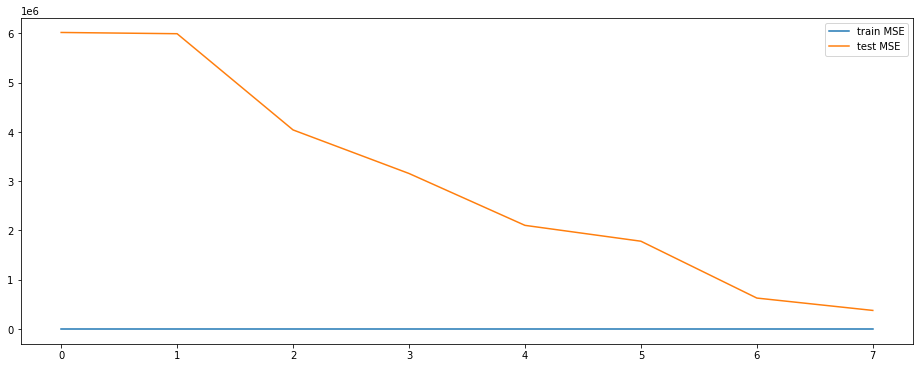

In [53]:
plt.figure(figsize=(16,6))
plt.plot(trainMSE, label='train MSE')
plt.plot(testMSE, label='test MSE')
plt.legend()
plt.show()